In [1]:
# Importando biblioteca para análise dos dados
import pandas as pd

# Biblioteca para visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

Link do data base: https://www.kaggle.com/datasets/omkargowda/suicide-rates-overview-1985-to-2021

In [2]:
# Importando os dados
base_dados = pd.read_csv('master.csv')

base_dados.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796.0,Boomers


In [3]:
# Verificando informação da base de dados
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             31756 non-null  object 
 1   year                31756 non-null  int64  
 2   sex                 31756 non-null  object 
 3   age                 31756 non-null  object 
 4   suicides_no         30556 non-null  float64
 5   population          31756 non-null  int64  
 6   suicides/100k pop   31756 non-null  float64
 7   country-year        31756 non-null  object 
 8   HDI for year        12300 non-null  float64
 9    gdp_for_year ($)   31756 non-null  object 
 10  gdp_per_capita ($)  31756 non-null  float64
 11  generation          31756 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.9+ MB


In [4]:
# Verificando se existe campos nulos 
base_dados.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no            1200
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [5]:
# Excluindo campos nulos
base_dados.dropna(inplace=True)

In [6]:
# Verificandod descrição da base de dados
base_dados.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,11100.000000,11100.000000,1.110000e+04,11100.000000,11100.000000,11100.000000
mean,2008.492973,200.138649,1.050981e+07,10.435245,0.791232,21635.349041
std,9.426392,619.021474,5.495243e+07,25.303042,0.095652,22549.820318
min,1985.000000,0.000000,8.750000e+02,0.000000,0.386358,313.000000
25%,2005.000000,3.000000,2.278942e+05,0.340000,0.723000,5288.000000
50%,2011.000000,28.000000,7.196980e+05,2.790000,0.795893,13170.000000
75%,2014.000000,131.000000,4.497005e+06,11.580000,0.873000,30896.000000
max,2020.000000,11767.000000,1.396215e+09,515.092734,0.972758,126352.000000


In [7]:
# Eliminando coluna que não será utilizada no projeto

base_dados.drop(columns=['country-year'], inplace=True)
base_dados.drop(columns=['HDI for year'],inplace=True)

base_dados


,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
72,Albania,1995,male,25-34 years,13.0,232900,5.580000,"2,42,44,99,009",835.000000,Generation X
73,Albania,1995,male,55-74 years,9.0,178000,5.060000,"2,42,44,99,009",835.000000,Silent
74,Albania,1995,female,75+ years,2.0,40800,4.900000,"2,42,44,99,009",835.000000,G.I. Generation
75,Albania,1995,female,15-24 years,13.0,283500,4.590000,"2,42,44,99,009",835.000000,Generation X
76,Albania,1995,male,15-24 years,11.0,241200,4.560000,"2,42,44,99,009",835.000000,Generation X
...,...,...,...,...,...,...,...,...,...,...
31751,Ukraine,2017,female,75+ years,256.0,44831135,0.571032,1.12E+11,2638.326055,G.I. Generation
31752,United Kingdom,2017,female,75+ years,104.0,66058859,0.157435,2.70E+12,40857.755580,G.I. Generation
31753,United States of America,2017,female,75+ years,501.0,325122128,0.154096,1.95E+13,60109.655730,G.I. Generation
31754,Uruguay,2017,female,75+ years,14.0,3422200,0.409094,64233966861,18690.893840,G.I. Generation


In [8]:
# Verificando a quantidade de suicidios durante os anos de todos os paises da base de dados

analise_total = base_dados[['year', 'suicides_no']].groupby(by=['year']).sum().reset_index()
analise_total

,year,suicides_no
0,1985,109828.0
1,1990,146614.0
2,1995,172711.0
3,2000,192016.0
4,2005,175788.0
5,2010,189495.0
6,2011,189231.0
7,2012,186110.0
8,2013,179842.0
9,2014,182389.0


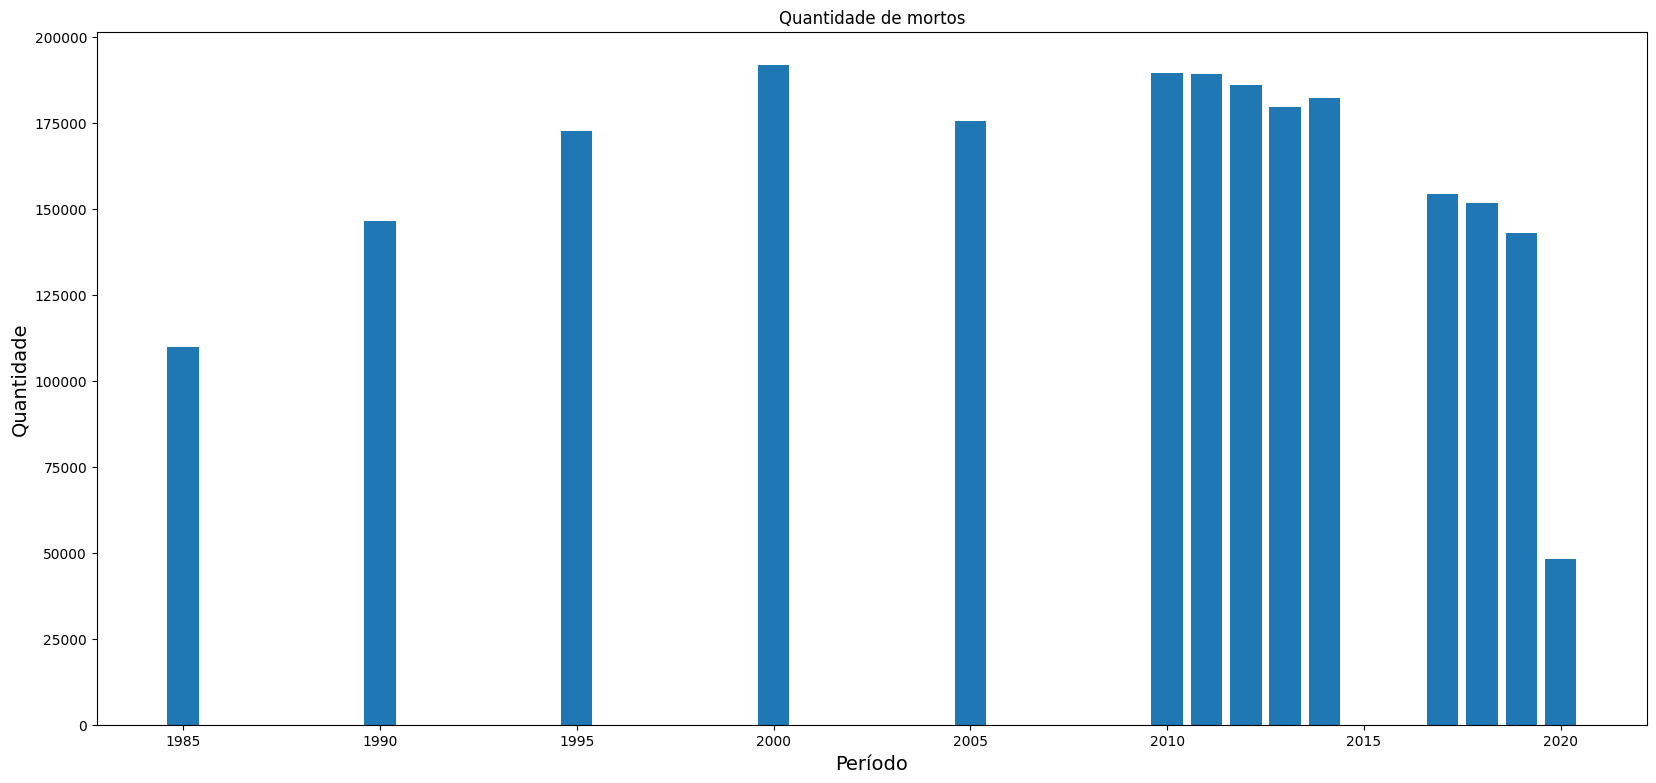

In [9]:
# Visualização da quantidade de morte por anos 
plt.figure(figsize=(20, 9))
plt.title('Quantidade de mortos')
plt.bar(analise_total['year'], analise_total['suicides_no']);
plt.xlabel('Período', fontsize=14)
plt.ylabel('Quantidade', fontsize=14);

In [10]:
# Análise de quantidade de suicídios em cada pais

analise_paises = base_dados.groupby(by=['country']).sum().reset_index()[['country', 'suicides_no']].sort_values('suicides_no', ascending=False)

analise_paises.head()

,country,suicides_no
102,United States,355963.0
48,Japan,299525.0
37,Germany,129566.0
14,Brazil,110915.0
35,France,106296.0


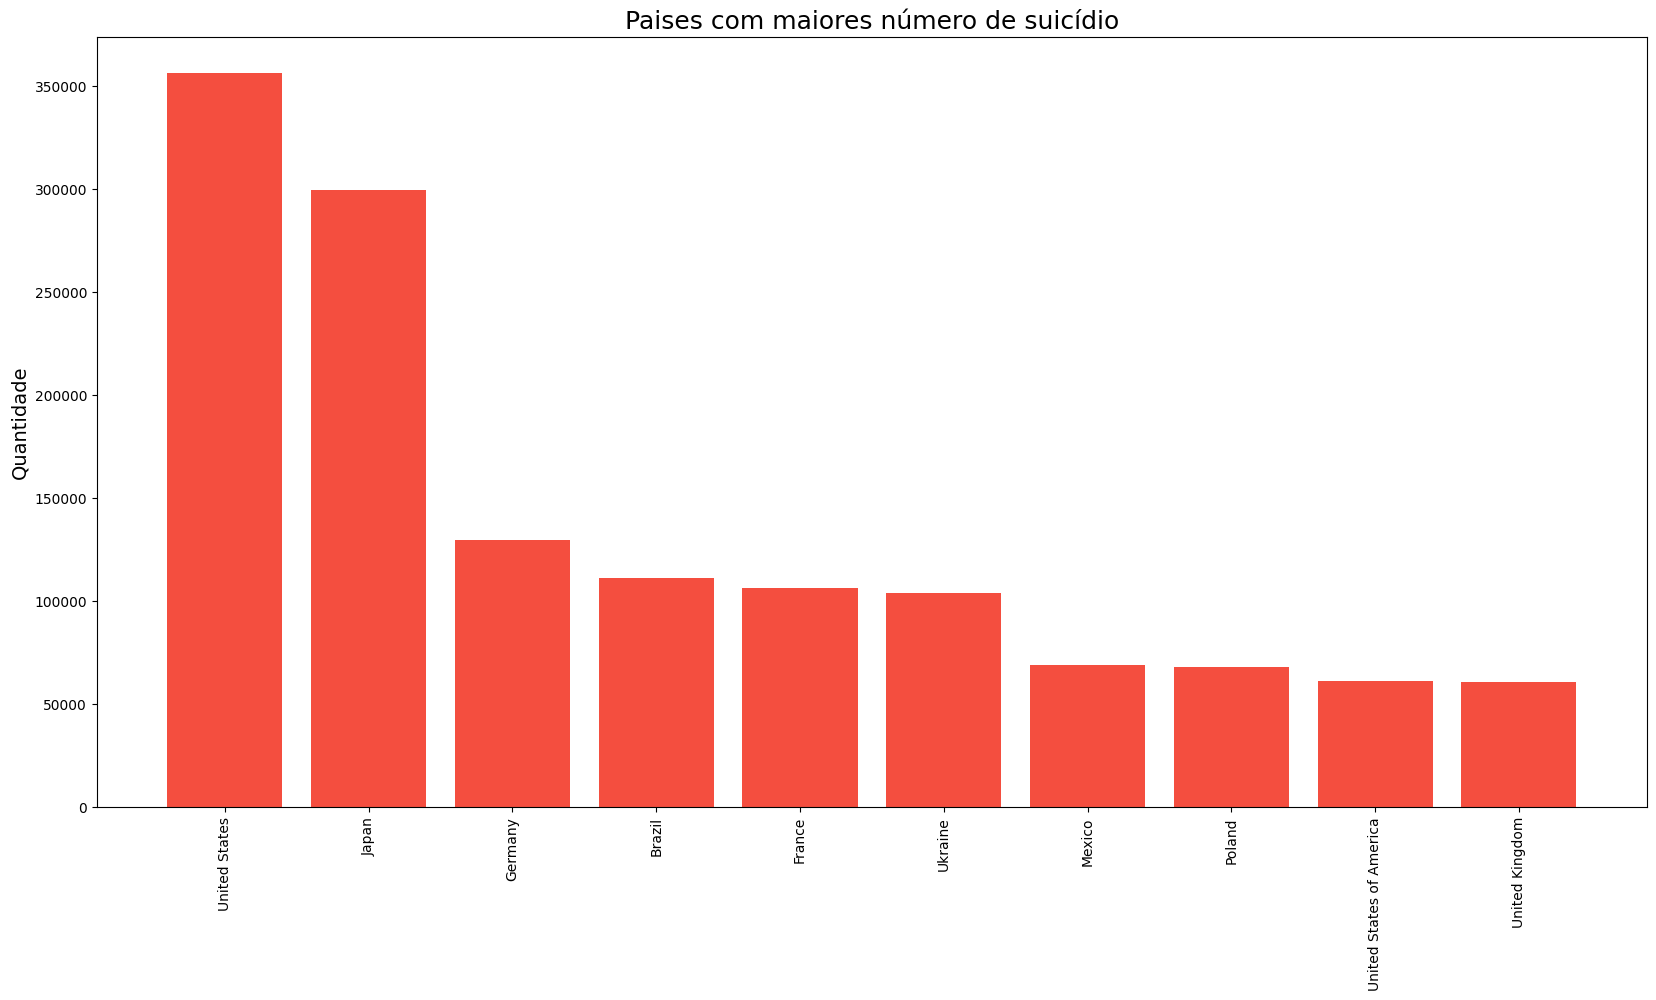

In [11]:
# Visualizando os 10 paises com maiores taxa de suicídio

# Tamanho 
plt.figure(figsize=(20, 10))

# titulo 
plt.title('Paises com maiores número de suicídio', loc='center', fontsize=18)

# Gráficos
# OBS: Posso chamar minha colunas das duas formas tanto com . tando entres []
plt.bar(analise_paises.country[0:10], analise_paises['suicides_no'][0:10], color='#f44e3f');

# labels 
plt.ylabel('Quantidade', fontsize=14)
plt.xticks(rotation=90);

In [12]:
# Verificando a geração com maior taxa de suicídio

geracoes = round(base_dados['generation'].value_counts( normalize = True) * 100, 2)

geracoes



Generation X       26.36
Silent             19.55
Millenials         17.96
Boomers            15.15
G.I. Generation    13.86
Generation Z        7.12
Name: generation, dtype: float64

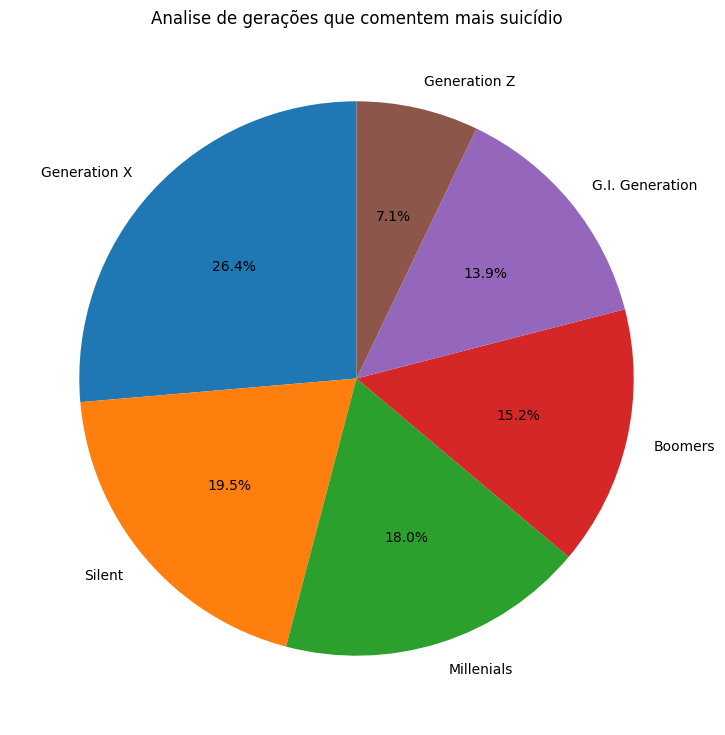

In [13]:
# Visualizando gerações com maior taxa de suicídio
plt.figure(figsize=(20, 9))
plt.title('Analise de gerações que comentem mais suicídio')
plt.pie(
    geracoes, 
    labels = geracoes.index,
    startangle=90, 
    autopct='%1.1f%%'
);

In [14]:
# Visualizando qual sexo comete mais suicídio 

analise_genero = base_dados[['sex', 'suicides_no']].groupby(by=['sex']).sum()

analise_genero

,suicides_no
sex,
female,556568.0
male,1664971.0


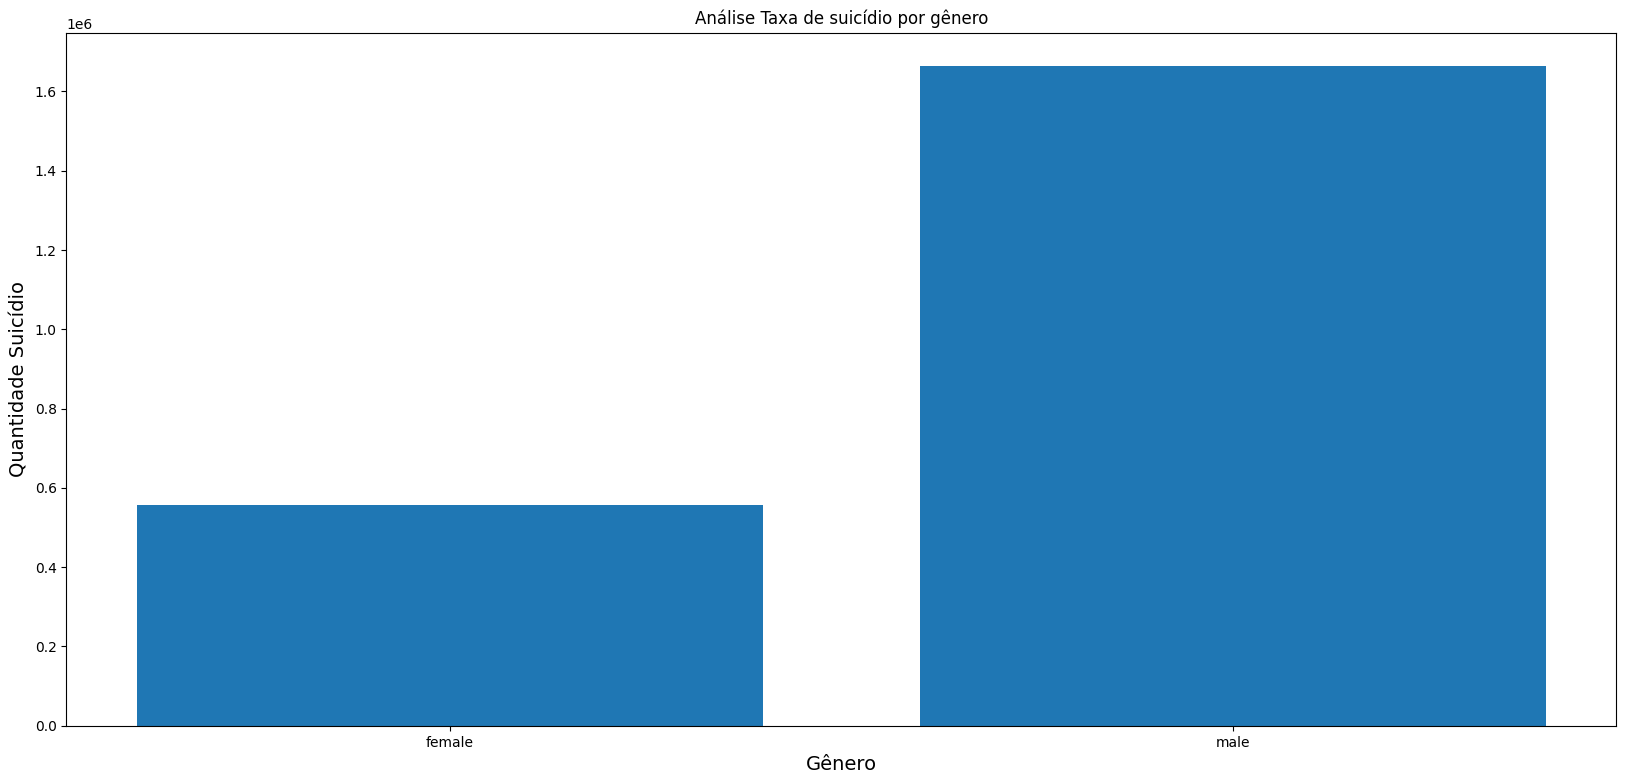

In [15]:
# Visualizando grafico de generos que cometem mais suicídio no mundo

plt.figure(figsize=(20, 9))
plt.title('Análise Taxa de suicídio por gênero')
plt.bar(analise_genero.index, analise_genero['suicides_no'])
plt.ylabel('Quantidade Suicídio', fontsize=14)
plt.xlabel('Gênero', fontsize=14);


## Análise do brasil sobre suicídio


In [16]:
brasil = base_dados.loc[base_dados['country'] == 'Brazil']

brasil


,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129.0,840300,15.350000,"2,22,94,27,90,435",1898.000000,G.I. Generation
4173,Brazil,1985,male,55-74 years,535.0,5364900,9.970000,"2,22,94,27,90,435",1898.000000,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011.0,11986300,8.430000,"2,22,94,27,90,435",1898.000000,Silent
4175,Brazil,1985,male,25-34 years,791.0,10762900,7.350000,"2,22,94,27,90,435",1898.000000,Boomers
4176,Brazil,1985,male,15-24 years,661.0,13834000,4.780000,"2,22,94,27,90,435",1898.000000,Generation X
...,...,...,...,...,...,...,...,...,...,...
31271,Brazil,2018,female,55-74 years,561.0,210166592,0.266931,1.92E+12,9151.381732,G.I. Generation
31353,Brazil,2017,female,55-74 years,524.0,208504960,0.251313,2.06E+12,9928.675897,G.I. Generation
31517,Brazil,2019,female,75+ years,88.0,211782878,0.041552,1.88E+12,8897.552966,G.I. Generation
31599,Brazil,2018,female,75+ years,99.0,210166592,0.047105,1.92E+12,9151.381732,G.I. Generation


In [17]:
# Qual sexo que tem maior taxa de morte no brasil?

brasil['sex'].value_counts(normalize=True) * 100


male      50.0
female    50.0
Name: sex, dtype: float64

In [27]:
# Verificando o ano que teve a maior quantidade de morte por suicídio 

analise = brasil[['year', 'suicides_no']].groupby(by=['year']).sum().reset_index()

analise


,year,suicides_no
0,1985,4228.0
1,1990,4803.0
2,1995,6536.0
3,2000,6763.0
4,2005,8529.0
5,2010,9429.0
6,2011,9822.0
7,2012,10295.0
8,2013,10513.0
9,2014,10631.0


<BarContainer object of 13 artists>

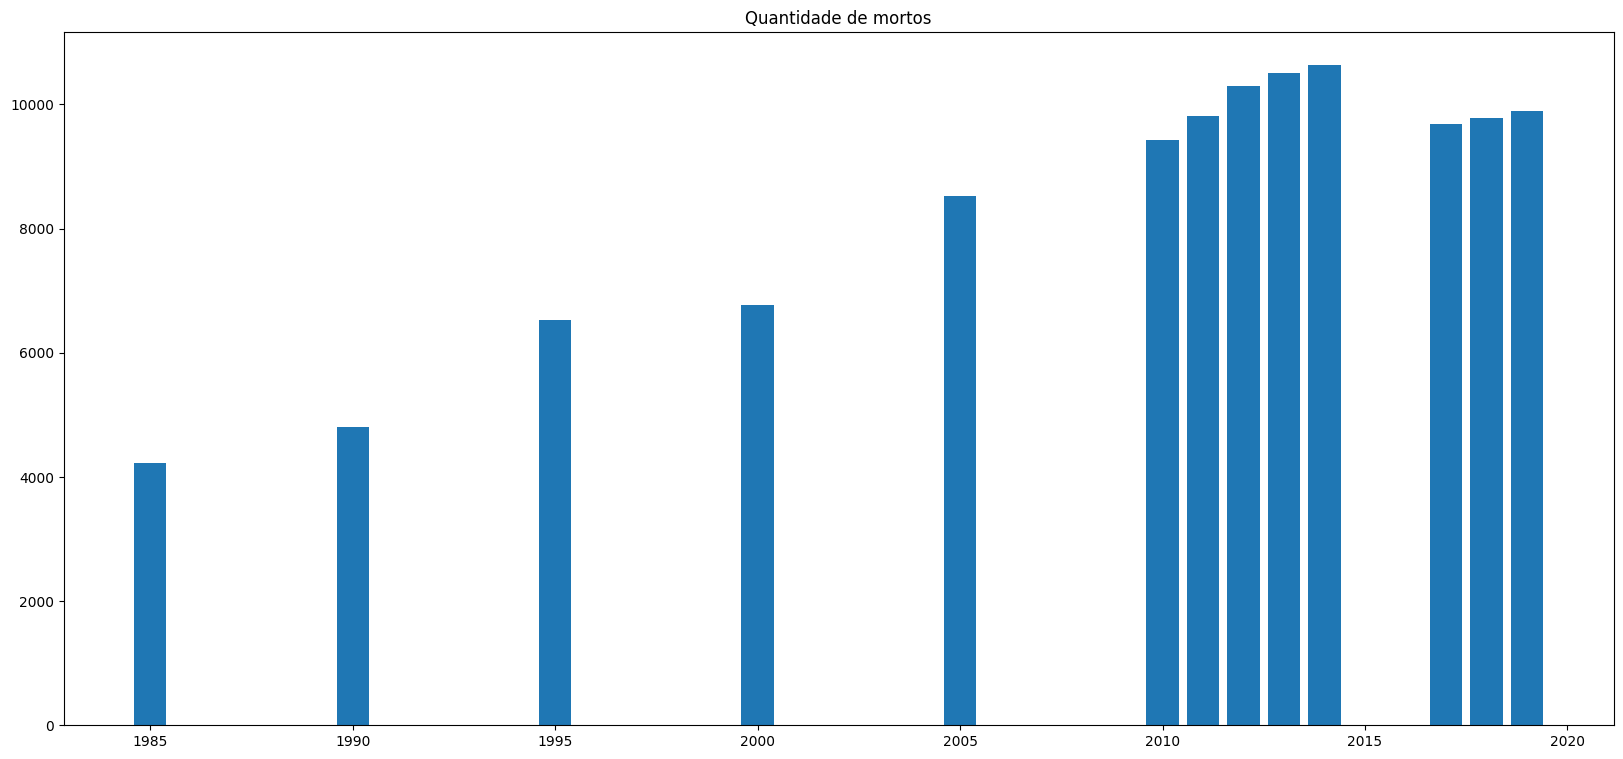

In [20]:
# Visualizando os dados acima em um gráfico de barra

plt.figure(figsize=(20, 9))
plt.title('Quantidade de mortos')
plt.bar(analise['year'], analise['suicides_no'])

In [21]:
# Verificando qual geração que tem a maior taxa de suicidio

brasil['generation'].value_counts(normalize=True) * 100

Generation X       26.923077
Silent             19.230769
Millenials         16.666667
G.I. Generation    15.384615
Boomers            15.384615
Generation Z        6.410256
Name: generation, dtype: float64

In [28]:
# Verificando qual gênero cometeram mais suicidio

analise_genero_brasil = brasil[['sex', 'suicides_no']].groupby(by=['sex']).sum() 

analise_genero_brasil

,suicides_no
sex,
female,27451.0
male,83464.0


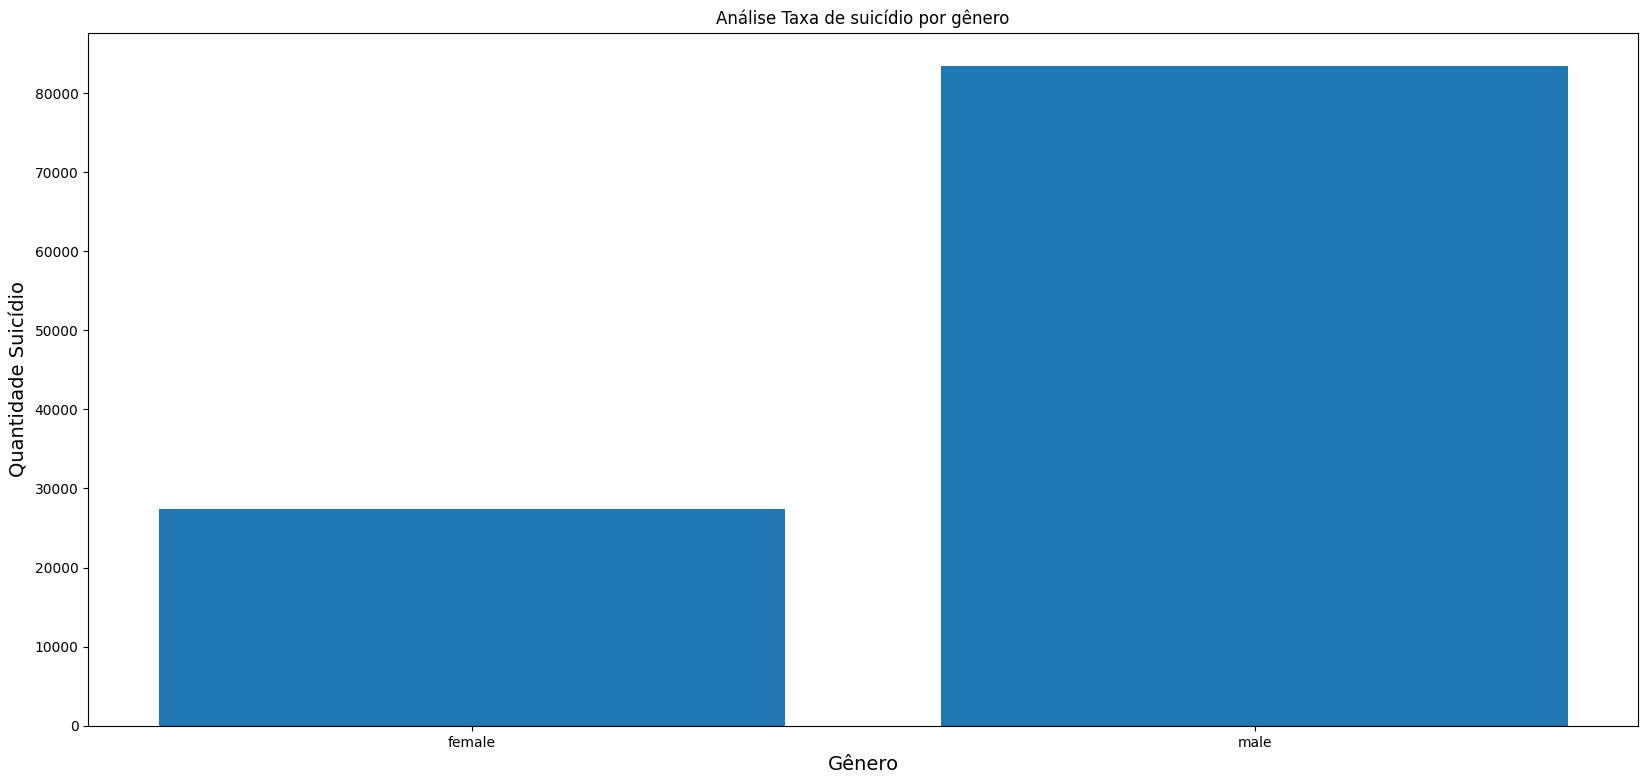

In [29]:
# Visualizando qual gênero cometeram mais suicídio

plt.figure(figsize=(20, 9))
plt.title('Análise Taxa de suicídio por gênero')
plt.bar(analise_genero_brasil.index, analise_genero_brasil['suicides_no'])
plt.ylabel('Quantidade Suicídio', fontsize=14)
plt.xlabel('Gênero', fontsize=14);

In [33]:
# Análise de geração 

analise_geracoes_brasil = round(brasil['generation'].value_counts( normalize = True) * 100, 2)

analise_geracoes_brasil

Generation X       26.92
Silent             19.23
Millenials         16.67
G.I. Generation    15.38
Boomers            15.38
Generation Z        6.41
Name: generation, dtype: float64

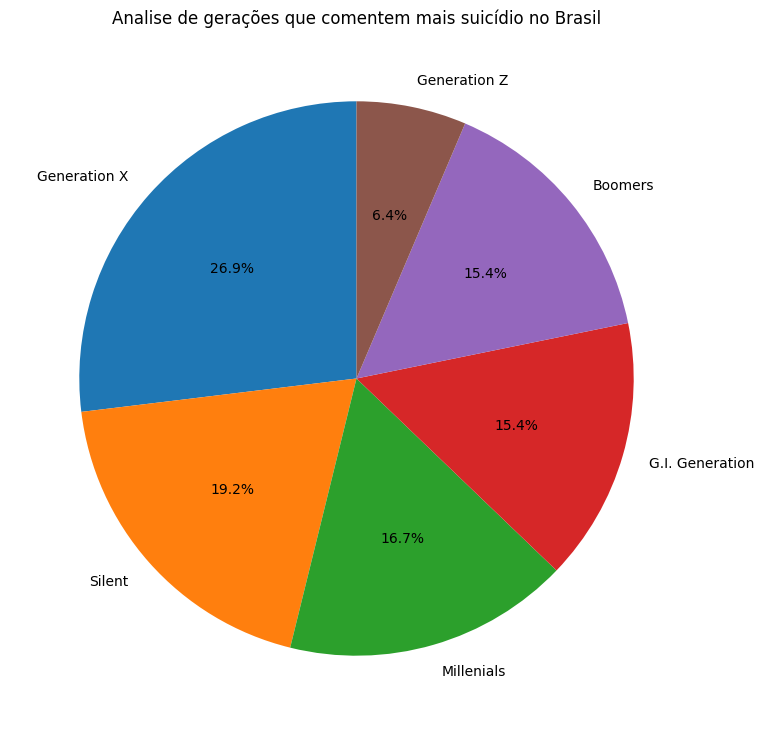

In [34]:
# Visualizando gerações com maior taxa de suicídio no brasil
plt.figure(figsize=(20, 9))
plt.title('Analise de gerações que comentem mais suicídio no Brasil')
plt.pie(
    analise_geracoes_brasil, 
    labels = analise_geracoes_brasil.index,
    startangle=90, 
    autopct='%1.1f%%'
);

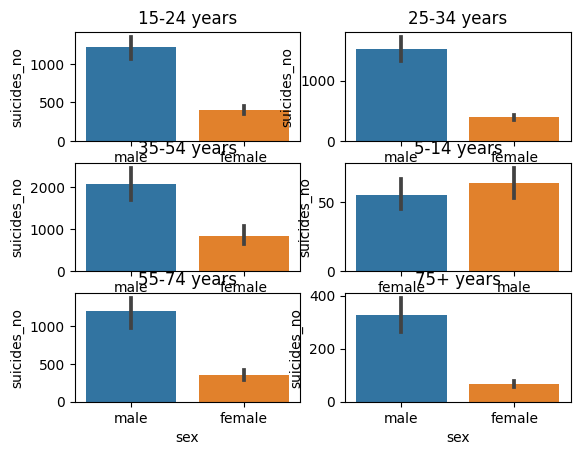

In [38]:
age = ['15-24 years','25-34 years','35-54 years','5-14 years','55-74 years','75+ years']
plot_id = 0
for c in age:
    teste = brasil.loc[brasil['age'] == c]
    plot_id += 1
    plt.subplot(3,2,plot_id)
    plt.title(c)
    fig, ax = plt.gcf(), plt.gca()
    sns.barplot(x=teste['sex'],y=teste['suicides_no']),

In [22]:
# Analisando o ano de 2014 qual geração teve a maior taxa de morte

analise_geracoes = brasil.loc[brasil['year'] == 2014]

analise_geracoes

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
4520,Brazil,2014,male,75+ years,390.0,2349303,16.60,"24,55,99,36,25,159",12975.0,Silent
4521,Brazil,2014,male,55-74 years,1534.0,12492114,12.28,"24,55,99,36,25,159",12975.0,Boomers
4522,Brazil,2014,male,35-54 years,3050.0,26475231,11.52,"24,55,99,36,25,159",12975.0,Generation X
4523,Brazil,2014,male,25-34 years,1982.0,17601477,11.26,"24,55,99,36,25,159",12975.0,Millenials
4524,Brazil,2014,male,15-24 years,1358.0,17606681,7.71,"24,55,99,36,25,159",12975.0,Millenials
4525,Brazil,2014,female,35-54 years,871.0,27971096,3.11,"24,55,99,36,25,159",12975.0,Generation X
4526,Brazil,2014,female,55-74 years,389.0,14550395,2.67,"24,55,99,36,25,159",12975.0,Boomers
4527,Brazil,2014,female,25-34 years,457.0,17539955,2.61,"24,55,99,36,25,159",12975.0,Millenials
4528,Brazil,2014,female,75+ years,83.0,3634999,2.28,"24,55,99,36,25,159",12975.0,Silent
4529,Brazil,2014,female,15-24 years,371.0,17094729,2.17,"24,55,99,36,25,159",12975.0,Millenials


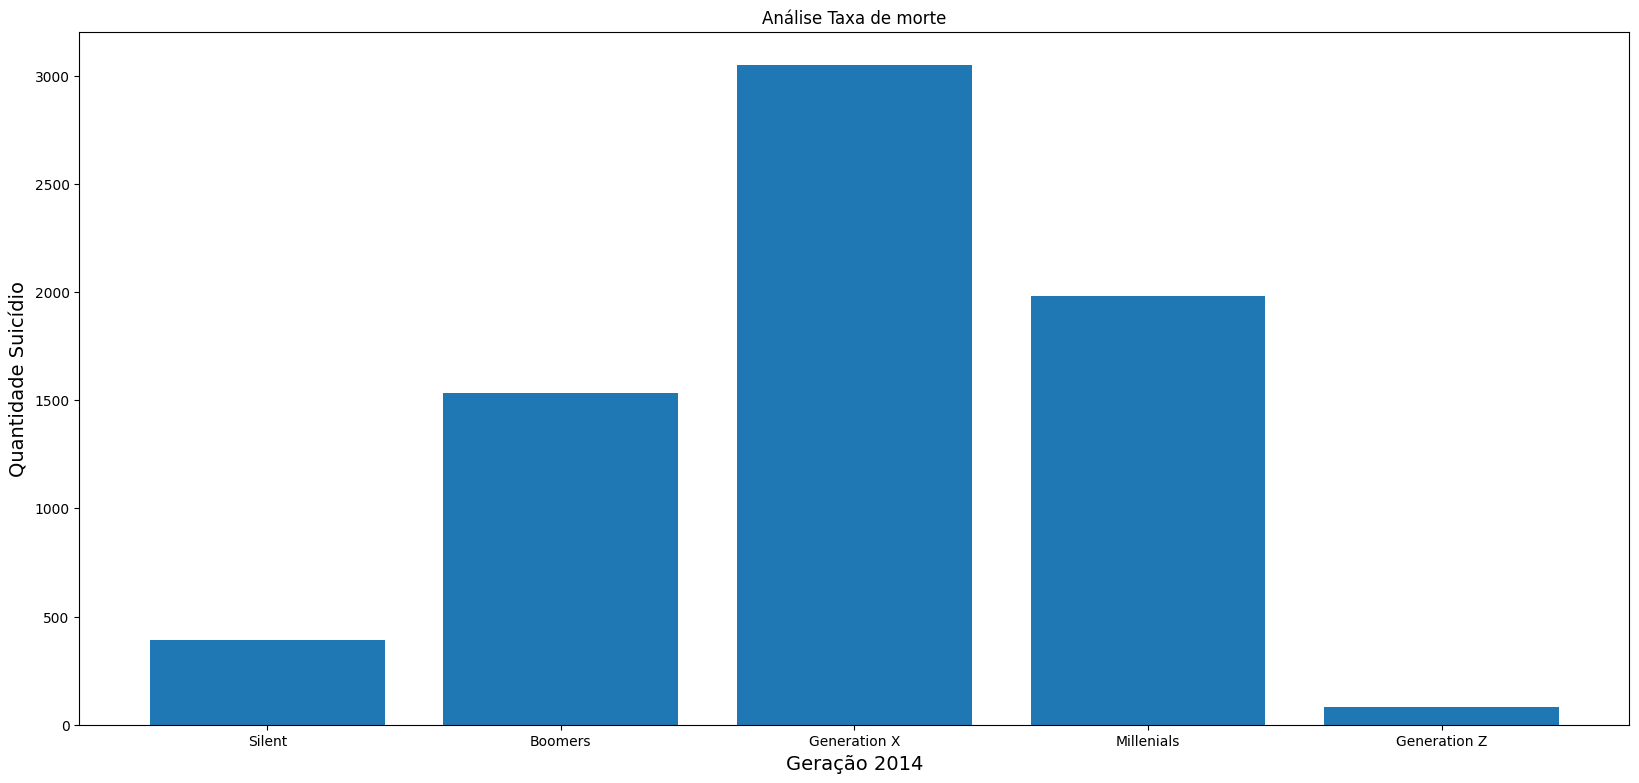

In [23]:
# Vizualizando a geração do ano de 2014 com maior taxa de morte

plt.figure(figsize=(20, 9))
plt.title('Análise Taxa de morte')
plt.bar(analise_geracoes['generation'], analise_geracoes['suicides_no'])
plt.ylabel('Quantidade Suicídio', fontsize=14)
plt.xlabel('Geração 2014', fontsize=14);


In [24]:
# Verificando qual genero que cometeu mais suicídio 

sexo = analise_geracoes[['sex', 'suicides_no']].groupby(by=['sex']).sum().reset_index()
sexo

,sex,suicides_no
0,female,2233.0
1,male,8398.0


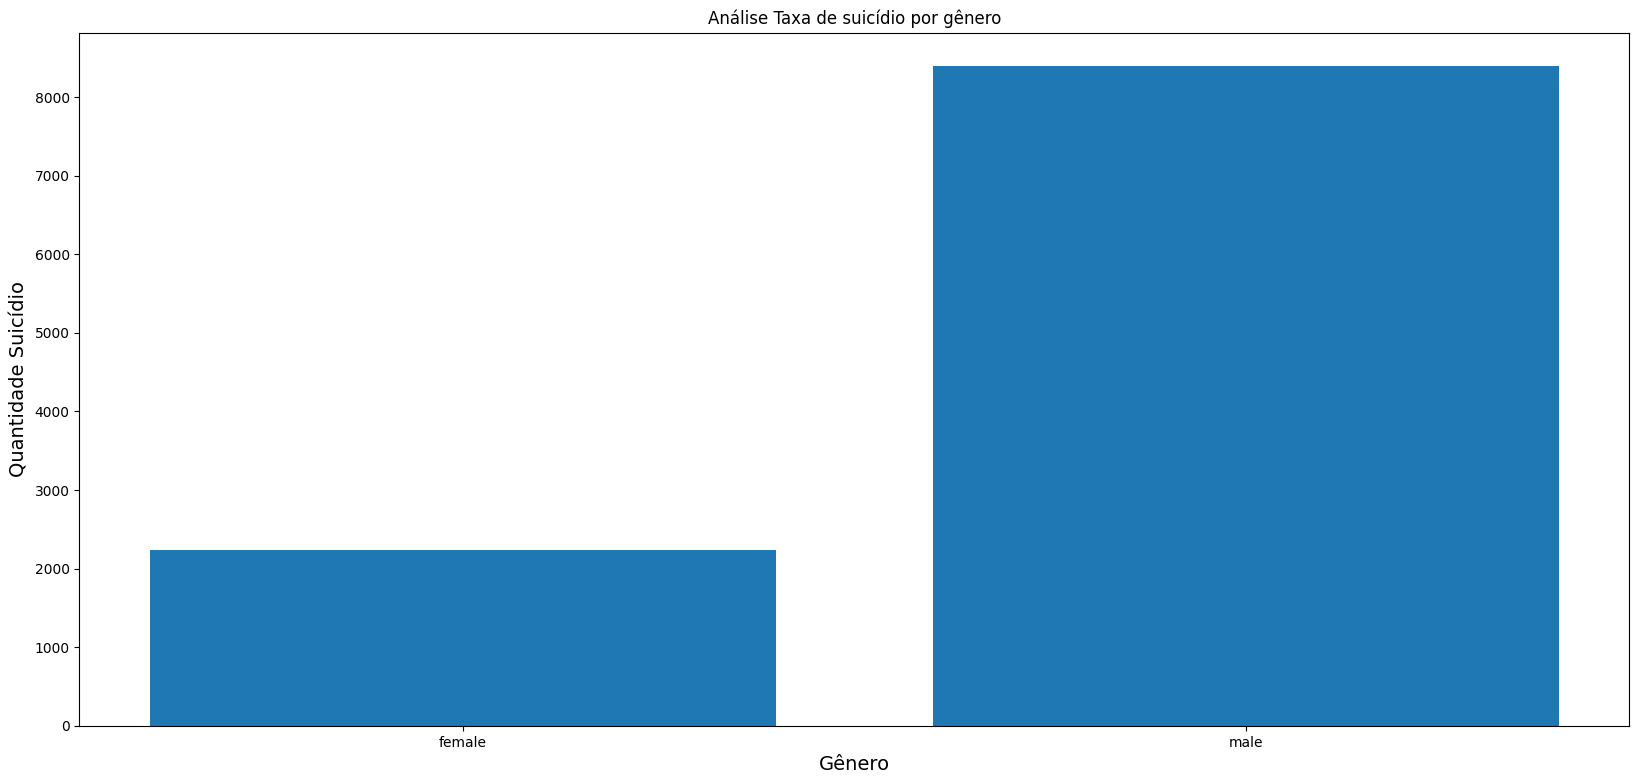

In [25]:
# Plotando análise de taxa de suicídio por gênero

plt.figure(figsize=(20, 9))
plt.title('Análise Taxa de suicídio por gênero')
plt.bar(sexo['sex'], sexo['suicides_no'])
plt.ylabel('Quantidade Suicídio', fontsize=14)
plt.xlabel('Gênero', fontsize=14);


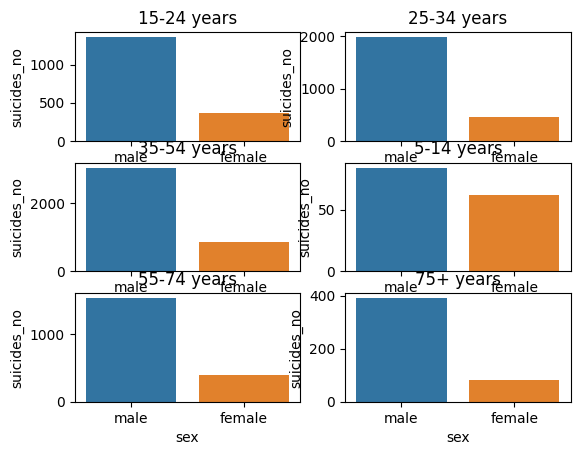

In [26]:
# Visualizando por idade os gênero que mais cometeram suicídio em 2014 
age = ['15-24 years','25-34 years','35-54 years','5-14 years','55-74 years','75+ years']
plot_id = 0
for c in age:
    teste = analise_geracoes.loc[analise_geracoes['age'] == c]
    plot_id += 1
    plt.subplot(3,2,plot_id)
    plt.title(c)
    fig, ax = plt.gcf(), plt.gca()
    sns.barplot(x=teste['sex'],y=teste['suicides_no']),

    #print(analise_geracoes.loc[analise_geracoes['age'] == c])